### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import scipy

### Simulating a 2 dimensional data:

In [2]:
np.random.seed(42)
X = 2*np.random.randn(1000,1)
Y = 10 + 2*X + np.random.randn(1000,1)

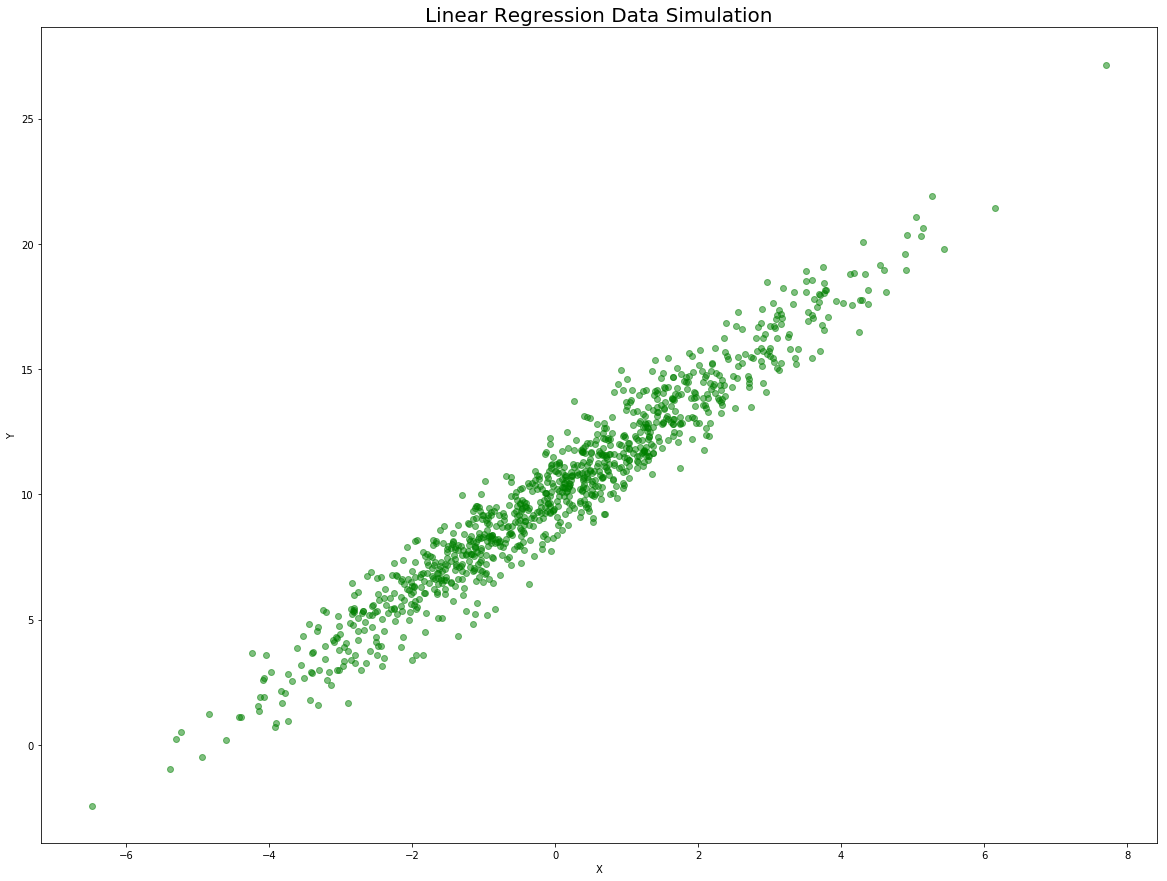

In [3]:
plt.figure(figsize=(20,15))
plt.axis(aspect='equal')
plt.axes(xlabel="X",ylabel="Y")
plt.title('Linear Regression Data Simulation', fontsize=20)
plt.scatter(X,Y, marker='o', c='g', alpha = 0.5)
plt.show()

### Linear Regression Model (Vectorized form):
$Y = h_\theta(X) = \theta^T.X$

### Cost Function: 
#### $MSE(X,h_\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T.x^{(i)} - y{(i)})^2$ 

### Partial Derivative of the Cost Function: 

$\frac{\partial}{\partial \theta} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}(\theta^T.x^{(i)}-y^{(i)})x_j^{(i)}$

#### Vectorized form:
$\bigtriangledown_\theta MSE(\theta) = \begin{bmatrix} \frac{\partial}{\partial\theta_0} MSE(\theta) \\ \frac{\partial}{\partial\theta_1} MSE(\theta)\\ {...} \\ \frac{\partial}{\partial\theta_m} MSE(\theta)\end{bmatrix} = \frac{2}{m}X^T(X.\theta-Y)$

Noticed that this formula involves calculations over the full trainingset X. at each Gradient Descent step. This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step. As a result is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using Normal Equation.

### Gradient Descent Step:
$\theta^{(next step)} = \theta-\eta\bigtriangledown_\theta MSE(\theta)$

### Executing Gradient Descent:

In [4]:
def calculate_GD(X_p,Y_p,theta):
    '''Calculate Gradient Descent'''
    m = X_p.shape[0]
    grads = (2/m) * X_p.T.dot(X_p.dot(theta)-Y_p)
    return grads

In [51]:
def process_GD(X_p,Y_p,theta,eta,interations):
    '''Execute the Gradient Descent process based ona number of interations'''
    theta_result = theta.copy()
    for step in range(interations):
        grads = calculate_GD(X_p,Y_p,theta_result)
        theta_result  = theta_result - eta*grads
    #print("\nBest theta parameter: \n Interceptor:{} \n Slope:{}".format(theta[0],theta[1]))
    return theta_result

In [37]:
def sim_Pred(theta):
    '''Simulates a prediction for a new instance'''
    X_new = np.array([[1],[3]])
    X_new_p = np.c_[np.ones((2,1)),X_new]
    pred = X_new_p.dot(theta)
    return X_new , pred

In [38]:
def print_Pred(X_new,pred):
    '''Add a plot of a new prediction the chart'''
    plt.plot(X_new,pred)

In [107]:
def run_GD(eta,interations):
    '''Run the Gradient Descent'''
    X_p = np.c_[np.ones((1000,1)),X]
    np.random.seed(41) 
    theta = np.random.randn(2,1)
    theta_result = process_GD(X_p,Y,theta,eta,interations)
    print("The best theta by Batch Gradient Descent Algorithm: \n Intercept: {} \n Slope:{}\n\n".format(theta_result[0], theta_result[1]))
run_GD(0.1,1000)

The best theta by Batch Gradient Descent Algorithm: 
 Intercept: [10.0716318] 
 Slope:[1.97942383]




In [108]:
from sklearn.linear_model import SGDRegressor
sgdReg = SGDRegressor(max_iter = 1000, penalty=None, eta0=0.1)
sgdReg.fit(X,Y.ravel())
print("The best theta by Scikit-Learn Batch Gradient Descent Algorithm: \n Intercept: {} \n Slope:{}\n\n".format(sgdReg.intercept_, sgdReg.coef_))

The best theta by Scikit-Learn Batch Gradient Descent Algorithm: 
 Intercept: [10.03869561] 
 Slope:[1.96584169]




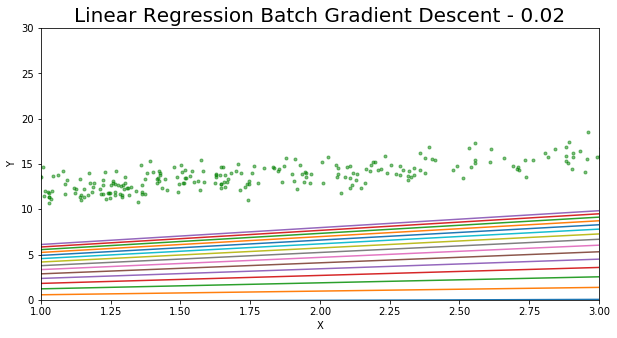

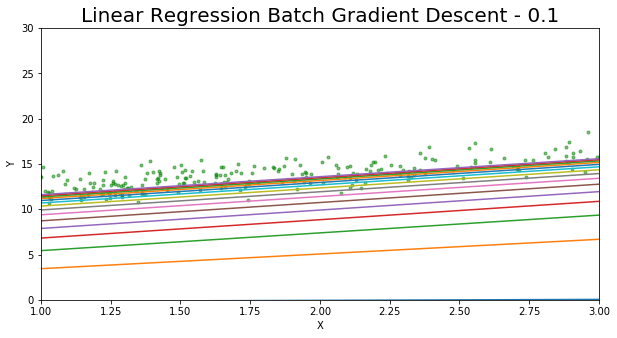

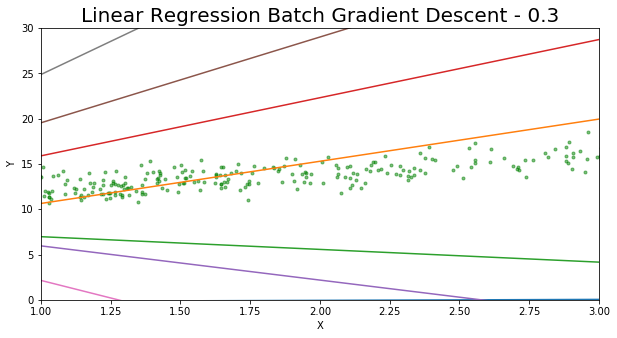

In [109]:
def compare_step_values(eta, interations, show_chart):
    '''Run the gradient descent and for each step plot the curve'''
    plt.figure(figsize=(10,5))
    plt.axes(xlabel="X",ylabel="Y")
    plt.title('Linear Regression Batch Gradient Descent - {}'.format(eta), fontsize=20)
    plt.plot(X,Y,"g.", alpha=0.5)
    plt.axis([1,3,0,30])
    plt.axis(aspect='equal')
    X_p = np.c_[np.ones((1000,1)),X]
    np.random.seed(41) 
    theta = np.random.randn(2,1) #random initialization of theta
    for itr in range(interations):
        theta_result = process_GD(X_p,Y,theta,eta,itr)
        X_new, predictions = sim_Pred(theta_result)
        print_Pred(X_new,predictions)
step_size_arr = [0.02,0.1,0.3]
for stp in step_size_arr:
    compare_step_values(stp,15,True)
plt.show()